In [14]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from toydown import GeoUnit, ToyDown
import geopandas as gpd
import glob

## Build noised csv from run results

In [15]:
adjusted_non_neg_2_att = np.load("../data/adjusted_non_neg_2_att_2010.npy", allow_pickle=True)

In [16]:
adjusted_non_neg_2_att_top_heavy = np.load("../data/adjusted_non_neg_2_att_2010_eps_0.5_split_0.5_0.25_0.125_0.125.npy", 
                                           allow_pickle=True)

In [17]:
# adjusted_all_vap = np.load("../data/adjusted_", allow_pickle=True)
adjusted_all_vap_top_heavy = np.load("../data/adjusted_non_neg_all_vap_2010_eps_0.5_split_0.5_0.25_0.125_0.125.npy",
                                     allow_pickle=True)

In [18]:
data = adjusted_all_vap_top_heavy
name = "toydown_irving_blocks_2010_all_vap_eps_0.5_split_0.5_0.25_0.125_0.125"
col_names = ['VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', 'OTHERVAP']

In [19]:
block_ids = list(filter(lambda k: len(k) == 15, data[0].keys()))

In [20]:
noised_data = pd.DataFrame(index=block_ids)

In [21]:
for i in range(len(data)):
    noised_sample = data[i]
    ids = np.zeros(len(noised_data), dtype=object)
    counts = np.zeros((len(noised_data), len(data[0]['48113'])))
    j = 0
    for node_id, cols in noised_sample.items():
        if len(node_id) == 15: ## is block
            ids[j] = node_id
            counts[j] = cols
            j += 1
    sample_df = pd.DataFrame(counts, columns=["{}_noise_{}".format(c, i) for c in col_names], index=ids)
    noised_data = pd.merge(noised_data, sample_df, left_index=True, right_index=True)

In [9]:
noised_data.to_csv("../data/{}.csv".format(name), index_label="GEOID")

In [10]:
noised_data.head()

,VAP_noise_0,HVAP_noise_0,WVAP_noise_0,BVAP_noise_0,AMINVAP_noise_0,ASIANVAP_noise_0,NHPIVAP_noise_0,OTHERVAP_noise_0,OTHERVAP_noise_0,VAP_noise_1,...,OTHERVAP_noise_98,VAP_noise_99,HVAP_noise_99,WVAP_noise_99,BVAP_noise_99,AMINVAP_noise_99,ASIANVAP_noise_99,NHPIVAP_noise_99,OTHERVAP_noise_99,OTHERVAP_noise_99
481130144071012,47.393146,3.343927e+01,4.772220e+00,1.571312e+00,5.152599e-11,7.610349e+00,1.252206e-10,0.0,5.673660e-11,2.439550e+01,...,1.018542e-10,3.846401e+01,1.197558e+01,1.694554e+01,3.790880e-12,0.0,9.542895e+00,0.0,0.0,0.0
481130144071002,17.480415,5.627810e-11,4.480752e-10,1.628067e+01,1.498908e-11,2.524658e-11,4.679921e-11,0.0,1.199745e+00,2.568793e-07,...,1.323852e-11,4.629288e-13,3.566025e-13,6.657787e-14,1.017953e-14,0.0,2.956889e-14,0.0,0.0,0.0
481130144071008,57.648907,2.328602e+01,3.436289e+01,1.519893e-10,2.759050e-11,2.421200e-11,7.847361e-11,0.0,2.284225e-11,1.035657e+02,...,2.572503e-11,1.128716e+02,5.223739e+01,1.806945e+01,4.256480e+01,0.0,2.452215e-14,0.0,0.0,0.0
481130144071005,1.740443,1.691387e-10,1.009139e-10,1.740443e+00,2.040057e-11,1.085793e-10,9.514830e-11,0.0,3.035614e-11,1.964889e+01,...,4.270275e-11,8.829358e+00,8.829358e+00,7.452488e-14,1.182145e-14,0.0,2.826158e-14,0.0,0.0,0.0
481130144071001,9.423312,1.578548e-10,4.466296e-11,9.423312e+00,1.803553e-11,5.057055e-11,2.529202e-11,0.0,2.854953e-11,1.107621e-11,...,2.815648e-11,1.995554e-13,9.229806e-14,1.859269e-14,1.134873e-14,0.0,7.731591e-14,0.0,0.0,0.0


In [22]:
epsilons = [0.25, 0.5, 1, 2]
splits = [("equal", [1/5, 1/5, 1/5, 1/5, 1/5]), ("top_heavy", [1/2, 1/4, 1/12, 1/12, 1/12]), 
          ("mid_heavy", [1/12, 1/6, 1/2, 1/6, 1/12]), ("bottom_heavy", [1/12, 1/12, 1/12, 1/4, 1/2])]
n_samps = 20

for eps in epsilons:
    for name, eps_split in splits:
        for f in glob.glob("irving_results/dallas_county_2010_VAP_eps_{}_{}_split_run_*.npy".format(eps, name)):
            f

In [23]:
np.load('irving_results/dallas_county_2010_VAP_eps_2_bottom_heavy_split_run_2.npy', allow_pickle=True)

array([None, None], dtype=object)

In [24]:
f

'irving_results/dallas_county_2010_VAP_eps_2_bottom_heavy_split_run_8.npy'

In [25]:
np.load('irving_results/irving_tree_2010_VAP_eps_0.25_bottom_heavy_split.npy', allow_pickle=True)

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)

### Merged noised data with elections and plot ER graph

In [26]:
noised_blocks = pd.read_csv("../data/toydown_irving_blocks_2010_all_vap_eps_0.5_split_0.5_0.25_0.125_0.125.csv")

In [27]:
city = gpd.read_file("../data/irving_blocks/irving_city_blocks10.shp")
isd = gpd.read_file("../data/irving_blocks/irving_isd_blocks10.shp")

In [28]:
noised_blocks["GEOID"] = noised_blocks["GEOID"].astype(str)

In [29]:
noised_isd = pd.merge(left=isd, right=noised_blocks, left_on="GEOID10", right_on="GEOID", how="inner")
noised_city = pd.merge(left=city, right=noised_blocks, left_on="GEOID10", right_on="GEOID", how="inner")

In [30]:
test = noised_isd.groupby("PCT08_NM").sum()[["HVAP10", "VAP10", 'IR06ISD3ST', 'IR06ISD3BE', 'IR06ISD4JO',
                                           'IR06ISD4CA', 'IR08ISD1PO', 'IR08ISD1BA', 'IR08ISD1JO', 'IR08ISD2JE',
                                           'IR08ISD2CH'] 
                                         + [col for col in noised_blocks.columns if '_noise_' in col]]
test_city = noised_city.groupby("PCT08_NM").sum()[['IR05CC5CAN','IR05CC5MED', 'IR05CC5COL', 
                                                   'IR08MAYGEA', 'IR08MAYJET', 'IR08MAYREZ',
                                                   'IR08CC3MEA', 'IR08CC3RIV',"HVAP10", "VAP10"]
                                                  + [col for col in noised_blocks.columns if '_noise_' in col]]

In [ ]:
def noised_isd_city()

In [60]:
def plot_er_graph(data, cand, elect, cand_col, elect_cols, filt=True, n_samps=100, 
                  ax=None, noisetype=None, scale=100):
    
    df = data.query(" | ".join(["{} != 0".format(c) for c in elect_cols])) if filt else data
    xp = np.linspace(0, 1, 100)
    perc_hvap = (df.HVAP10 / df.VAP10).fillna(0)
    perc_cand = (df[cand_col] / sum([df[c] for c in elect_cols])).fillna(0)
    line = sp.stats.linregress(perc_hvap, perc_cand)
    l = np.poly1d([line.slope, line.intercept])

    ms = np.zeros(n_samps)
    rs = np.zeros(n_samps)

    if ax==None:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(1, 1, 1)
    ax.set_title("ER - Votes for {}: {}".format(cand, elect))
    ax.set_xlim(-0.05,1.05)
    ax.set_ylim(-0.05,1.05)

    for i in range(n_samps):
        if noisetype == "gaussian":
            noise_hvap = np.random.normal(scale=scale, size=df.HVAP10.shape)
            noise_vap = np.random.normal(scale=scale, size=df.VAP10.shape)
            
            perc_hvap_noised = (df.HVAP10 + noise_hvap) / (df.VAP10 + noise_vap)
            
        else:
            perc_hvap_noised = (df["HVAP_noise_{}".format(i)] / df["VAP_noise_{}".format(i)]).fillna(0)
            
        line_noised = sp.stats.linregress(perc_hvap_noised, perc_cand)
        ln = np.poly1d([line_noised.slope, line_noised.intercept])
        ms[i] = line_noised.slope
        rs[i] = line_noised.rvalue
        ax.plot(perc_hvap_noised, perc_cand, '.', color="lightcoral")
        ax.plot(xp, ln(xp), '-', color="lightcoral")
        
    ax.plot(perc_hvap, perc_cand, '.', color="b")
    ax.plot(xp, l(xp), '-', color="b", 
             label="m: {}, R^2: {}".format(round(line.slope, 3), round(line.rvalue**2,3)))
    ax.plot([], [], '-', color="r", 
             label="E(m): {}, E(R^2): {}".format(round(np.mean(ms),3), round(np.mean(rs**2),3)))  
    
    ax.legend()
    ax.set_xlabel("% HVAP")
    ax.set_ylabel("{} % of Voters".format(cand))
    return ax

## Plot ER results

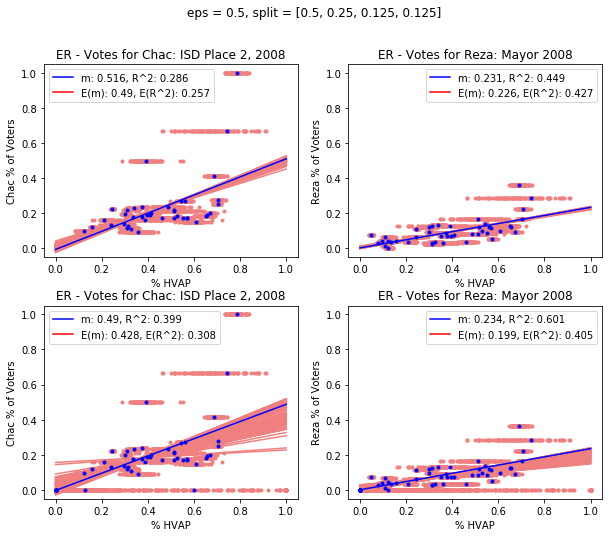

In [37]:
filt = True
eps = 0.5
split = [1/2,1/4,1/8,1/8]
split_name = "top_heavy"
details = "all_vap_cols"

fig, axs = plt.subplots(2,2, figsize=(10,8))

fig.suptitle("eps = {}, split = {}".format(eps, split))
plt.subplots_adjust(hspace = 0.25)

## plot isd graphs
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[0,0], filt=filt)
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[1,0], filt=False)
# plot_er_graph(test, "Benavidez", "ISD Place 3, 2006", "IR06ISD3BE", ["IR06ISD3BE", "IR06ISD3ST"], 
#               ax=axs[0,1], filt=filt)
# plot_er_graph(test, "Carranza", "ISD Place 4, 2006", "IR06ISD4CA", ["IR06ISD4CA", "IR06ISD4JO"], 
#               ax=axs[0,2], filt=filt)

## plot city graphs
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[0,1], filt=filt)
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[1,1], filt=False)
# plot_er_graph(test_city, "Rivera", "City Council Place 3, 2008", "IR08CC3RIV", ["IR08CC3RIV", "IR08CC3MEA"],
#               ax=axs[1,1], filt=filt)
# plot_er_graph(test_city, "Medina", "City Council Place 5, 2005", "IR05CC5MED", 
#              ["IR05CC5CAN", "IR05CC5MED", "IR05CC5COL"], ax=axs[1,2], filt=filt)

# plt.savefig("plots/Irving_ToyDown_blocks_ER_eps_{}_{}_filt_{}_{}.png".format(eps, split_name, filt, details))
plt.show()

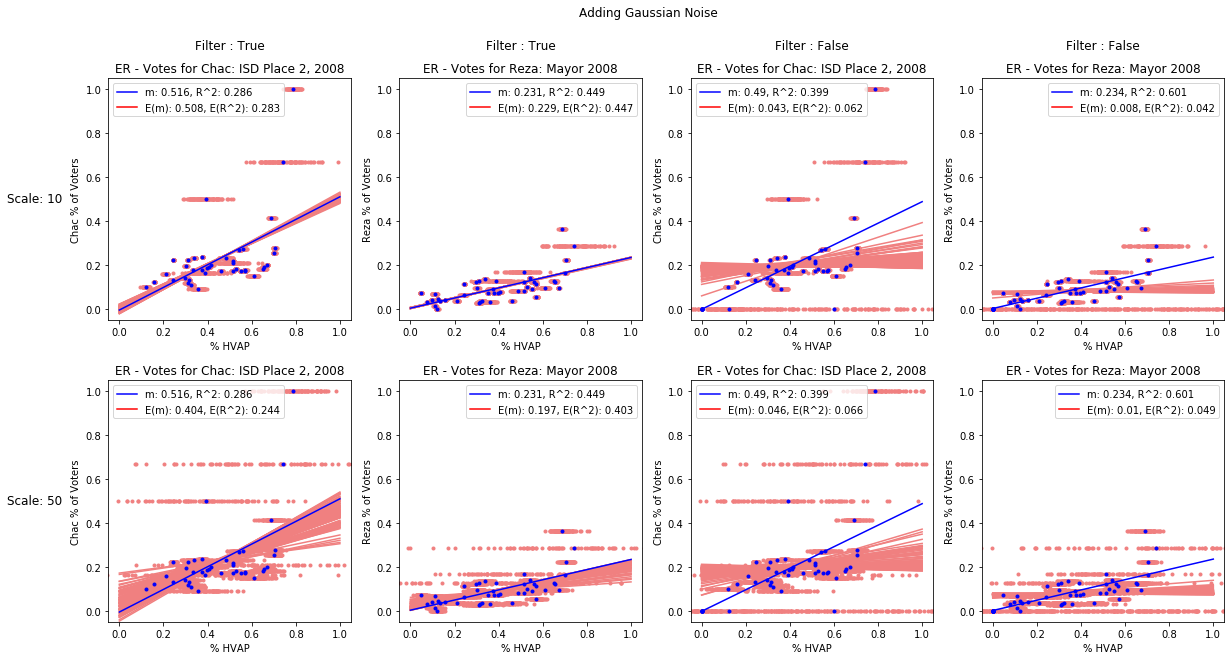

In [103]:
filt = True
scale = 10

fig, axs = plt.subplots(2,4, figsize=(20,10))

fig.suptitle("Adding Gaussian Noise")
plt.subplots_adjust(hspace = 0.25)

## plot isd graphs
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[0,0], filt=filt, noisetype="gaussian", scale=scale)
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[0,2], filt=False, noisetype="gaussian", scale=scale)


## plot city graphs
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[0,1], filt=filt, noisetype="gaussian", scale=scale)
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[0,3], filt=False, noisetype="gaussian", scale=scale)

scale = 50
## plot isd graphs
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[1,0], filt=filt, noisetype="gaussian", scale=scale)
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[1,2], filt=False, noisetype="gaussian", scale=scale)


## plot city graphs
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[1,1], filt=filt, noisetype="gaussian", scale=scale)
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[1,3], filt=False, noisetype="gaussian", scale=scale)

pad = 5
for ax, row in zip(axs[:,0], ["Scale: {}".format(s) for s in [10, 50]]):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
for ax, col in zip(axs[0], ["Filter : {}".format(s) for s in [True, True, False, False]]):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, ax.xaxis.labelpad + 5*pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
    
plt.savefig("test.png".format(eps, split_name, filt, details))
plt.show()

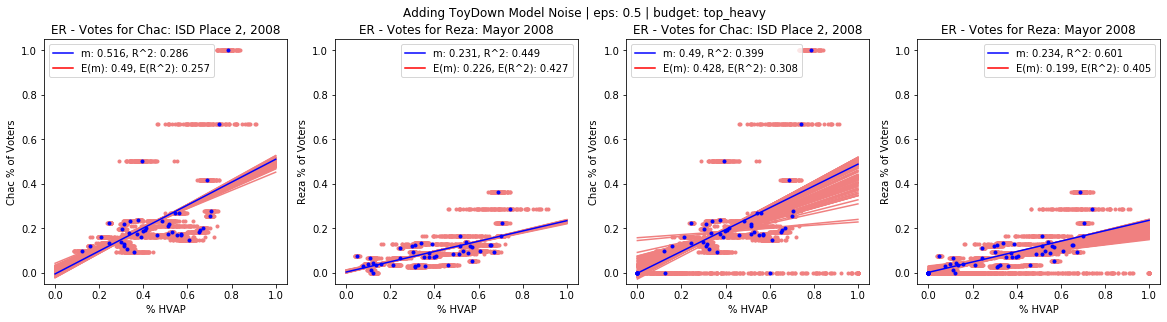

In [104]:
eps = 0.5
split = [1/2,1/4,1/8,1/8]
split_name = "top_heavy"
details = "all_vap_cols"

fig, axs = plt.subplots(1,4, figsize=(20,4.5))

fig.suptitle("Adding ToyDown Model Noise | eps: {} | budget: {}".format(eps, split_name))
plt.subplots_adjust(hspace = 0.25)

## plot isd graphs
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[0], filt=filt)
plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
              ax=axs[2], filt=False)


## plot city graphs
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[1], filt=filt)
plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
              ax=axs[3], filt=False)

# scale = 50
# ## plot isd graphs
# plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
#               ax=axs[1,0], filt=filt)
# plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"], 
#               ax=axs[1,2], filt=False)


# ## plot city graphs
# plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
#               ax=axs[1,1], filt=filt)
# plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"], 
#               ax=axs[1,3], filt=False)

pad = 5
# for ax, row in zip(axs[:,0], ["Split: {}".format(s) for s in [10, 50]]):
#     ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 size='large', ha='right', va='center')
    
# for ax, col in zip(axs, ["Filter : {}".format(s) for s in [True, True, False, False]]):
#     ax.annotate(col, xy=(0.5, 1), xytext=(0, ax.xaxis.labelpad + pad),
#                 xycoords='axes fraction', textcoords='offset points',
#                 size='large', ha='center', va='baseline')
    
plt.savefig("test2.png".format(eps, split_name, filt, details))
plt.show()

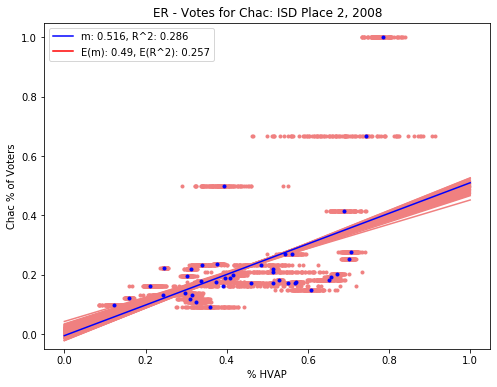

In [20]:
fig = plot_er_graph(test, "Chac", "ISD Place 2, 2008", "IR08ISD2CH", ["IR08ISD2CH", "IR08ISD2JE"])
plt.show()

In [ ]:
fig = plot_er_graph(test, "Benavidez", "ISD Place 3, 2006", "IR06ISD3BE", ["IR06ISD3BE", "IR06ISD3ST"])
plt.show()

In [ ]:
fig = plot_er_graph(test, "Carranza", "ISD Place 4, 2006", "IR06ISD4CA", ["IR06ISD4CA", "IR06ISD4JO"])
plt.show()

In [ ]:
fig = plot_er_graph(test_city, "Reza", "Mayor 2008", "IR08MAYREZ", ["IR08MAYREZ", "IR08MAYGEA", "IR08MAYJET"])
plt.show()

In [ ]:
fig = plot_er_graph(test_city, "Rivera", "City Council Place 3, 2008", "IR08CC3RIV", ["IR08CC3RIV", "IR08CC3MEA"])
plt.show()

In [ ]:
fig = plot_er_graph(test_city, "Medina", "City Council Place 5, 2005", "IR05CC5MED", 
                    ["IR05CC5CAN", "IR05CC5MED", "IR05CC5COL"])
plt.show()

In [131]:
noise = np.zeros((100,2294))
for i in range(100):
    noise[i] = noised_isd.VAP10 - noised_isd["VAP_noise_{}".format(i)]
    
noised_isd["mean_noise"] = abs(noise).mean(axis=0)

noise = np.zeros((100,3447))
for i in range(100):
    noise[i] = noised_city.VAP10 - noised_city["VAP_noise_{}".format(i)]
    
noised_city["mean_noise"] = abs(noise).mean(axis=0)

(array([ 334., 1605.,  895.,  405.,  119.,   43.,   26.,    8.,    8.,
           4.]),
 array([-13.67721605,  -7.33202468,  -0.98683332,   5.35835805,
         11.70354941,  18.04874078,  24.39393214,  30.73912351,
         37.08431487,  43.42950624,  49.7746976 ]),
 <a list of 10 Patch objects>)

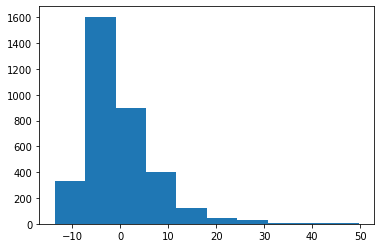

In [173]:
plt.hist(noise.mean(axis=0))

(array([1144.,  729., 1113.,  347.,   57.,   29.,   14.,    6.,    6.,
           2.]),
 array([2.24121136e-11, 4.97881536e+00, 9.95763071e+00, 1.49364461e+01,
        1.99152614e+01, 2.48940768e+01, 2.98728921e+01, 3.48517075e+01,
        3.98305228e+01, 4.48093382e+01, 4.97881536e+01]),
 <a list of 10 Patch objects>)

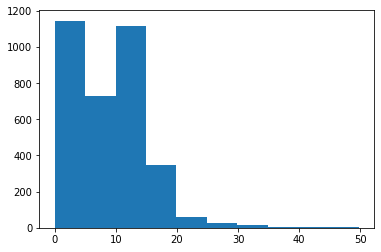

In [174]:
plt.hist(noised_city.mean_noise)

In [169]:
noised_city.mean_noise.mean(), noised_isd.mean_noise.mean()

(8.95170265179673, 9.811003566279833)

(2416383.1289668577, 2467848.9844533927, 6960335.179529804, 7018011.093329565)

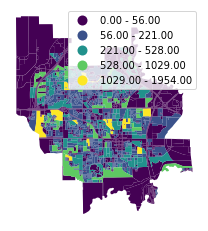

In [177]:
noised_isd.plot(column="TOTPOP10", legend=True, scheme="naturalbreaks")
plt.axis("off")

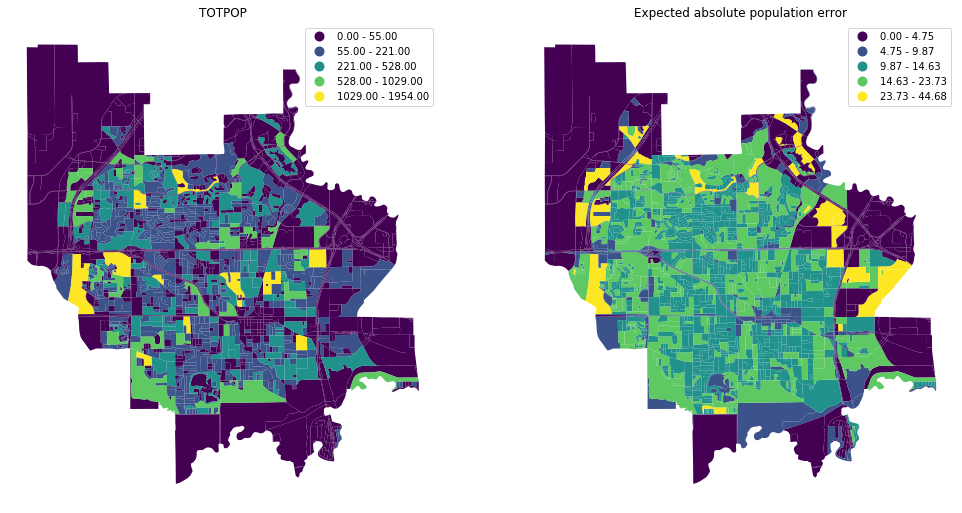

In [185]:
fig, axs = plt.subplots(1,2, figsize=(17,9))
noised_isd.plot(column="mean_noise", legend=True, scheme="naturalbreaks", ax=axs[1])
axs[1].set_title("Expected absolute population error")
axs[1].axis("off")
noised_isd.plot(column="TOTPOP10", legend=True, scheme="naturalbreaks", ax=axs[0])
axs[0].set_title("TOTPOP")
axs[0].axis("off")
# noised_city.plot(column="mean_noise", legend=True, scheme="naturalbreaks", ax=axs[1])
plt.show()

In [165]:
noised_isd.query("mean_noise < 10 & TOTPOP10 > 10")[['TOTPOP10', 'NH_WHITE10',
       'NH_BLACK10', 'NH_AMIN10', 'NH_ASIAN10', 'NH_NHPI10', 'NH_OTHER10',
       'NH_2MORE10', 'HISP10', 'H_WHITE10', 'H_BLACK10', 'H_AMIN10',
       'H_ASIAN10', 'H_NHPI10', 'H_OTHER10', 'H_2MORE10', 'VAP10', 'HVAP10',
       'WVAP10', 'BVAP10', 'AMINVAP10', 'ASIANVAP10', 'NHPIVAP10',
       'OTHERVAP10', '2MOREVAP10']]

,TOTPOP10,NH_WHITE10,NH_BLACK10,NH_AMIN10,NH_ASIAN10,NH_NHPI10,NH_OTHER10,NH_2MORE10,HISP10,H_WHITE10,...,H_2MORE10,VAP10,HVAP10,WVAP10,BVAP10,AMINVAP10,ASIANVAP10,NHPIVAP10,OTHERVAP10,2MOREVAP10
23,11,5,1,0,0,0,0,0,5,5,...,0,8,2,5,1,0,0,0,0,0
40,11,0,1,0,0,0,0,0,10,4,...,0,6,5,0,1,0,0,0,0,0
60,30,0,6,1,10,0,0,0,13,6,...,1,18,7,0,4,0,7,0,0,0
83,21,2,0,0,0,0,0,0,19,15,...,0,10,8,2,0,0,0,0,0,0
147,17,4,0,0,0,0,4,0,9,0,...,0,11,4,3,0,0,0,0,4,0
173,27,1,0,0,0,0,0,0,26,10,...,0,13,12,1,0,0,0,0,0,0
192,11,0,0,0,11,0,0,0,0,0,...,0,7,0,0,0,0,7,0,0,0
269,16,11,0,0,1,0,0,1,3,3,...,0,13,1,10,0,0,1,0,0,1
284,17,7,3,0,1,0,0,0,6,0,...,0,12,2,7,2,0,1,0,0,0
357,32,19,1,0,2,0,0,0,10,7,...,0,27,6,18,1,0,2,0,0,0


In [162]:
isd.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'GEOID10',
       'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TOTPOP10', 'NH_WHITE10',
       'NH_BLACK10', 'NH_AMIN10', 'NH_ASIAN10', 'NH_NHPI10', 'NH_OTHER10',
       'NH_2MORE10', 'HISP10', 'H_WHITE10', 'H_BLACK10', 'H_AMIN10',
       'H_ASIAN10', 'H_NHPI10', 'H_OTHER10', 'H_2MORE10', 'VAP10', 'HVAP10',
       'WVAP10', 'BVAP10', 'AMINVAP10', 'ASIANVAP10', 'NHPIVAP10',
       'OTHERVAP10', '2MOREVAP10', 'NAME', 'state', 'county', 'tract', 'block',
       'geoid', 'HCVAP09', 'NHCVAP09', 'AMNCVAP09', 'ACVAP09', 'BCVAP09',
       'HPICVAP09', 'WCVAP09', 'CVAP09', 'HCVAP09M', 'NHCVAP09M', 'AMNCVAP09M',
       'ACVAP09M', 'BCVAP09M', 'HPICVAP09M', 'WCVAP09M', 'CVAP09M', 'HCPOP00',
       'WCPOP00', 'BCPOP00', 'ACPOP00', 'OTHRCPOP00', '2MORCPOP00', 'HCVAP00',
       'WCVAP00', 'BCVAP00', 'ACVAP00', 'OTHRCVAP00', '2MORCVAP00', 'CPOP00',
       'CVAP00', 'PCT08', '